## QUESTION 3

### 1) Carry out the design of RBF NN based on Gaussian kernel functions with constant spread function and using all the points in the training set as centers of the RB functions. Compare the performance results (mean square error) as you vary the spread parameter while keeping it the same for all kernel functions. Discuss your findings?

In [1]:
import numpy as np
from scipy.linalg import norm, pinv

In [2]:
# TRAINING DATA BY RANDOMLY SAMPLING
''' 
Splitting the 441 dataset into 80% to training and 20% to testing 
Hence 352 samples considered for training

'''
in_list = []
out_list = []
for i in range (352):
    x= np.random.randint(0,21)
    y= np.random.randint(0,21)

    
    x1 = -2 +0.2*x
    y1 = -2 + 0.2*y
    
    if ((x1 ** 2 + y1 **2) <=1):
        out_list .append(1)
    else:
        out_list.append(-1)
        
    in_list.append([x1,y1])
    
in_list=np.array(in_list)
out_list=np.array(out_list)
        


In [3]:
# TESTING DATA BY RANDOMLY SAMPLING
''' 
Splitting the 441 dataset into 80% to training and 20% to testing 
Hence 89 samples considered for testing

'''
testin_list = []
testout_list = []
for i in range (89):
    x= np.random.randint(0,21)
    y= np.random.randint(0,21)
    
    x1 = -2 +0.2*x
    y1 = -2 + 0.2*y
    
    if ((x1 ** 2 + y1 **2) <=1):
        testout_list.append(1)
    else:
        testout_list.append(-1)
        
    testin_list.append([x1,y1])
    
testin_list=np.array(testin_list)
testout_list=np.array(testout_list)
 

In [4]:
def distance (x,c):
    ''' Finding the distance ie ||x-c||^2'''
    d= norm(x-c)**2
    
    return d 

In [5]:
def gaussian(in_list,centers,si):
    
    '''
    Finding the gaussian matrix 
    which will be of size N*M where N is the number of sample and
    M is the number of centers . The inputs taken are (input, centers,sigma)

    '''
    gauss=np.zeros((in_list.shape[0],centers.shape[0]),float)
    for index_c, c in enumerate(centers):
        for index_in, in_ in enumerate(in_list):
            d = distance(in_,c)
            g=np.exp(-d/(2*(si **2)))
            
            gauss[index_in,index_c]=g
            
    return gauss
            

In [6]:
def weight_cal(in_list,centers,si,out_list):
    ''' Calculate the weights inputs taken are input,centers, sigma value, and the initial output labels'''
    
    mat_array=gaussian(in_list,centers,si)
    w=np.dot(pinv(mat_array),out_list)
    
    
    return w

In [7]:
def cal_output(test_list,centers,sigma,w):
    
    ''' Finding the output by multiplying G.W. The inputs are taken test input,centers, sigma value, weights'''
    
    
    gauss_mat_test= gaussian(test_list,centers,sigma)
    out= np.dot(gauss_mat_test,w)
    return out

In [8]:
def Mean_sq_err(y_true,y_pred):
    ''' inputs taken are true lables, and predicted labels'''
    return (np.square(y_true- y_pred).mean())

In [9]:
def accuracy_score(y_true,y_pred):
    ''' inputs taken are true lables, and predicted labels'''
    return np.mean(y_true == y_pred)

In [27]:
# Sigma range values 
sigma_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,10,15,20,25]
error_list=[]
accuracy_list=[]
for i in sigma_list: 
    w= weight_cal(in_list,in_list,i,out_list)
    y_value= cal_output(testin_list,in_list,i,w)
    y_pred= np.sign(y_value)
    error= Mean_sq_err(testout_list,y_pred)
    error_list.append(error)
    accuracy = accuracy_score(testout_list,y_pred)
    accuracy_list.append(accuracy)
    print("The MSE error when sigma equal to {} is {} and the accuracy is {}".format(i,error,accuracy))

The MSE error when sigma equal to 0.1 is 0.0 and the accuracy is 1.0
The MSE error when sigma equal to 0.2 is 0.0898876404494382 and the accuracy is 0.9775280898876404
The MSE error when sigma equal to 0.3 is 0.0898876404494382 and the accuracy is 0.9775280898876404
The MSE error when sigma equal to 0.4 is 0.449438202247191 and the accuracy is 0.8876404494382022
The MSE error when sigma equal to 0.5 is 0.6741573033707865 and the accuracy is 0.8314606741573034
The MSE error when sigma equal to 0.6 is 0.7640449438202247 and the accuracy is 0.8089887640449438
The MSE error when sigma equal to 0.7 is 0.4943820224719101 and the accuracy is 0.8764044943820225
The MSE error when sigma equal to 0.8 is 0.2247191011235955 and the accuracy is 0.9438202247191011
The MSE error when sigma equal to 0.9 is 0.2247191011235955 and the accuracy is 0.9438202247191011
The MSE error when sigma equal to 1 is 0.0449438202247191 and the accuracy is 0.9887640449438202
The MSE error when sigma equal to 2 is 0.0 

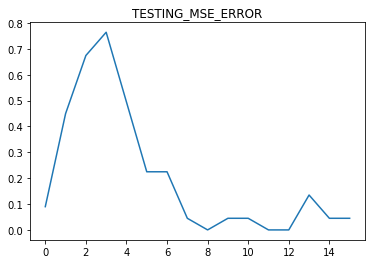

In [25]:
# PLOTTING THE ERROR 
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.title("TESTING_MSE_ERROR")
plt.show()


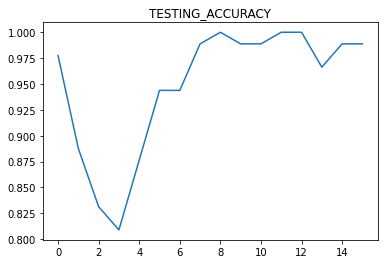

In [26]:
# PLOTTING THE ERROR 
import matplotlib.pyplot as plt
plt.plot(accuracy_list)
plt.title("TESTING_ACCURACY")
plt.show()

## BRIEF SUMMARY OF RBF AND SIGMA VALUE SELECTED

RBF uses a nonlinear transformation in the hidden layer transforms low dimensional space to high dimensional space such that it can be easily classified. This is also called the kernel trick. The non linear transformation applied in this problem is the gaussian function.
The RBF uses unsupervised method to determine the centers and supervised method to calculate the weights, thus making RBF an hybrid approach.

From the implementation and the graph obtained, in this case the accuracy of 100% is obtained when sigma value is 0.1, but during multiple random runs it is noted that sigma value of 0.1 didn't perform consistently. The reason behind this is that smaller width didn't provide good interpolation of the function in between sample points.

However, a width value of 1 and 2 provided a good accuracy consistently. In this implementation an accuracy of 100% is obtained when sigma value is 2. This shows that when sigma is 2 an adequate interpolation property is provided to the network.

In this particular case, even large value of sigma also performs better, but this is not ideal for all runs as there could be loss of information when the ranges of the radial functions are further away from
the original range of the function. It is also noted that since it is a exponential function after a spread value of 20 the accuracy almost saturates.

Thus by the mentioned analysis, I have chosen a mid range sigma value of 2 with accuracy of 100% as my optimal width value. 


## 2) Perform the design of the RBF NN, using this time only 150 centers, choosing the centers using two approaches


### a) Randomly select the centers from the input data.

In [13]:
random_indices = np.random.choice(in_list.shape[0], size=150, replace=False)

In [14]:
list_in_150= in_list[random_indices,:]

In [36]:
# For testing kindly change the sigma value for w_150 and y_value_150
w_150= weight_cal(in_list,list_in_150,2,out_list)
y_value_150= cal_output(testin_list,list_in_150,2,w_150)
y_pred_150= np.sign(y_value)
error_150= Mean_sq_err(testout_list,y_pred_150)
accuracy_150 = accuracy_score(testout_list,y_pred_150)

In [37]:
print("The Error for taking 150 random centers with sigma value as 2 is ",error_150)
print("The Accuracy for taking 150 random centers with sigma value as 2 is ",accuracy_150)

The Error for taking 150 random centers with sigma value as 2 is  0.0449438202247191
The Accuracy for taking 150 random centers with sigma value as 2 is  0.9887640449438202


### b) Use K-Means algorithm to find the centers. You can use a Kmeans function defined in sklearn

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=150)
y_kmeans=kmeans.fit(in_list)

In [19]:
kmean_center=kmeans.cluster_centers_

In [34]:
# For testing kindly change the sigma value for w_k_150 and y_value_k_150
w_k_150= weight_cal(in_list,kmean_center,2,out_list) 
y_value_k_150= cal_output(testin_list,kmean_center,2,w_k_150)
y_pred_k_150= np.sign(y_value_k_150)
error_k_150= Mean_sq_err(testout_list,y_pred_k_150)
accuracy_k_150 = accuracy_score(testout_list,y_pred_k_150)

In [35]:
print("The Error for taking 150 kmean centers with sigma value as 2 is ",error_k_150)
print("The Accuracy for taking 150 kmean centers with sigma value as 2 is ",accuracy_k_150)

The Error for taking 150 kmean centers with sigma value as 2 is  0.0898876404494382
The Accuracy for taking 150 kmean centers with sigma value as 2 is  0.9775280898876404


## RESULT COMPARISON OF 150 CENTERS WITH 352 CENTERS


From the results obtained due to random intilization of 150 centers from the entire 352 training data, based on the random center selection it sometimes performs better than Kmeans center or some times performs less compared to Kmeans and same sometimes, but the difference in accuracy for kmeans and random 150 center initialization is very less.

For optimal performace the hidden layer (i.e) the number of non linear transformation used should be equal to the input data. Too sparse function can cause degradation of the network performance. This can be visualized in the implementation as when the hidden layer is spanned across the input dataspace, the accuracy obtained when sigma value 2 is 100% and when hidden layer was 150 the network performance dropped to 98% for random centers and 97.7% for k means center for the same sigma value. 

The main intution behind RBF is transforming low dimensional data to high dimensional space for better linear seperability (i.e) higher the dimension better the network performance, and the ideal multi dimensional space for projecting the data is the same as the input dataspace (ie) the number of sample. Hence when the entire training data is considered as centers possibility of better linear seperation of datapoints is possible due to higher dimension than compared to 150 centers. This claim is supported by the results obtained.
